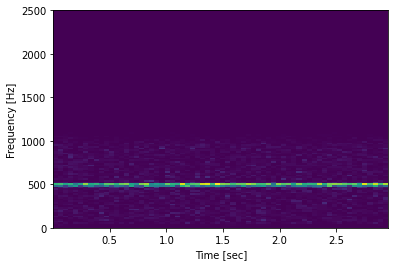

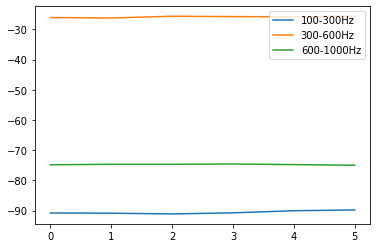

In [4]:
import masking_analysis.sound as sound
from masking_analysis.sound import Sound, MaskingAnalyzer
import matplotlib.pyplot as plt

analyzer = sound.masking_analyzer_from_exp_config_txt('./test_data/experiment_config_example.textproto')
se = analyzer.get_signal_excess()

analyzer.plot_signal_and_noise_spectrogram()

for band, excess in se.items():
    plt.plot(excess, label=f'{band.start_freq}-{band.stop_freq}Hz')
plt.legend(loc='upper right')